In [1]:
import os
from skimage import io, exposure, filters, restoration, img_as_float
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

In [2]:
root_dir = 'datasets/aquarium-data-cots/aquarium_pretrain' # Double check this is correct since adding to the VM

splits = ['train', 'test','valid']

input_dir = os.path.join(root_dir, 'train', 'images')
output_dir = os.path.join(root_dir, 'train', 'enhanced_images')

os.makedirs(output_dir, exist_ok=True)

In [3]:
max_images = 10
processed_count = 0

for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for valid image formats
        img_path = os.path.join(input_dir, filename)
        
        # Load image
        img = io.imread(img_path)
        img = img_as_float(img)
        
        # Apply enhancements
        # 1. Contrast Adjustment
        img_contrast = exposure.rescale_intensity(img, in_range='image', out_range=(0, 1)) #change out_range to be 0,1 or 0,255 depending
        
        # 2. Histogram Equalization
        img_equalized = exposure.equalize_adapthist(img_contrast, clip_limit=0.03)
        
        # 3. Denoising
        img_denoised = restoration.denoise_wavelet(img_equalized, channel_axis=-1)
        
        # 4. Sharpening (Edge Enhancement)
        img_sharpened = filters.unsharp_mask(img_denoised, radius=1, amount=1)
        # enhanced image = original + amount * (original - blurred)
        
        # Save enhanced image
        output_path = os.path.join(output_dir, filename)

        # Convert image to uint8 before saving
        img_to_save = img_as_ubyte(img_sharpened)
        io.imsave(output_path, img_to_save)
        
        print(f"Enhanced image saved: {output_path}")

        processed_count += 1
        if processed_count >= max_images:
            print(f"Processed {max_images} images")
            break


Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_2503_jpeg_jpg.rf.726342a02d92d30abc147f6e71fe3baf.jpg
Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_8495_jpg.rf.207e20fe66feab6da48e9bbf2e9aeb83.jpg
Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_2598_jpeg_jpg.rf.5650ef75065f27a08cb74975840016a5.jpg
Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_8496_MOV-5_jpg.rf.eacca955182a03a262de9b2c4012ecc4.jpg
Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_2307_jpeg_jpg.rf.cdea03288eac0ee043c709d25aae71a7.jpg
Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_8522_jpg.rf.de6f1dbe20d278d2b0052bc448aa93d8.jpg
Enhanced image saved: datasets/aquarium-data-cots/aquarium_pretrain/train/enhanced_images/IMG_2571_jpeg_jpg.rf.d26821c850

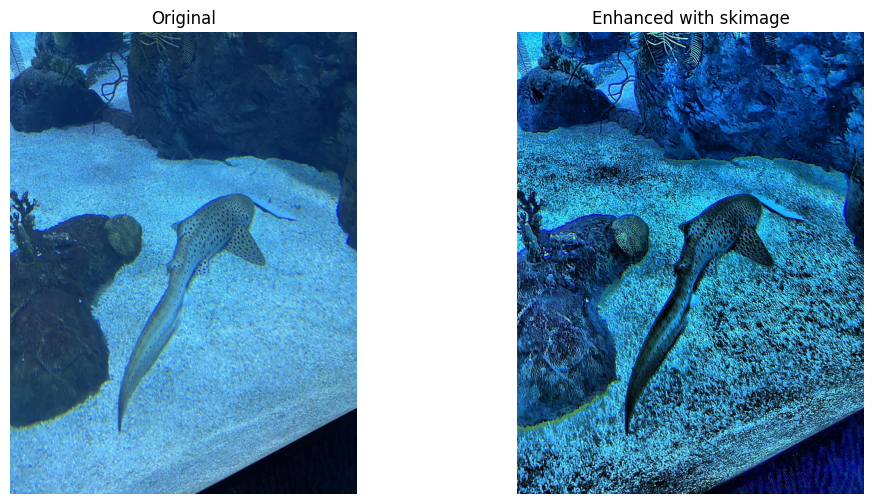

In [17]:
# Optionally, display a sample image before and after enhancement
sample_img = io.imread(os.path.join(input_dir, os.listdir(input_dir)[0]))
enhanced_img = io.imread(os.path.join(output_dir, os.listdir(output_dir)[0]))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(sample_img)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(enhanced_img)
ax[1].set_title("Enhanced with skimage")
ax[1].axis("off")
plt.show()